# Quiz Project Streamlit: 
- **Nama:** Herlambang Rafli Wicaksono
- **Dataset:** https://www.kaggle.com/datasets/imgowthamg/car-price

Dataset ini berisi informasi tentang berbagai model mobil, dengan atribut-atribut seperti rating risiko asuransi, produsen mobil, jenis bahan bakar, aspirasi mesin, jumlah pintu, gaya bodi, jenis roda penggerak, lokasi mesin, dimensi (wheelbase, length, width, height), bobot, tipe mesin, jumlah silinder, ukuran mesin, sistem bahan bakar, spesifikasi mesin (bore ratio, stroke, compression ratio, horsepower, peak RPM), dan konsumsi bahan bakar.

## Menentukan Pertanyaan Bisnis

- Fitur apa saja yang paling mempengaruhi harga mobil
- Apakah fitur-fitur tersebut bisa diandalkan secara akurat untuk menebak harga mobil

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('archive\\CarPrice_Assignment.csv')

### Assessing Data

In [3]:
# check Missing value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
# Check Duplication
df.duplicated().sum()

0

In [5]:
#Check datatype
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
# Check the number of unique values of each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### Cleaning Data

Datanya sudah bersih, gaada null, gaada duplikat, jadi gas aja.

## Exploratory Data Analysis (EDA)

In [7]:
#Check statistics of data set
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Kesimpulan sementara:
1. **Jenis mobil:**
   - Dataset mencakup 205 model mobil, semuanya unik tanpa duplikat.
   - Atribut ukuran, berat, dan kapasitas mesin bervariasi di antara mobil-mobil tersebut.

2. **Rentang Harga:**
   - Harga Minimum $5,118
   - Harga Maksimum $45,400
   - Rata-rata harga mobil sekitar $13,276.

3. **Distribusi Data:**
   - Fitur-fitur seperti `carwidth`, `curbweight`, `enginesize` menunjukkan variasi yang signifikan.
   - Kemungkinan adanya pencilan pada `compressionratio` dan `horsepower` karena lompatan dari 75% ke maxnya terlalu jauh

## Visualization & Explanatory Analysis

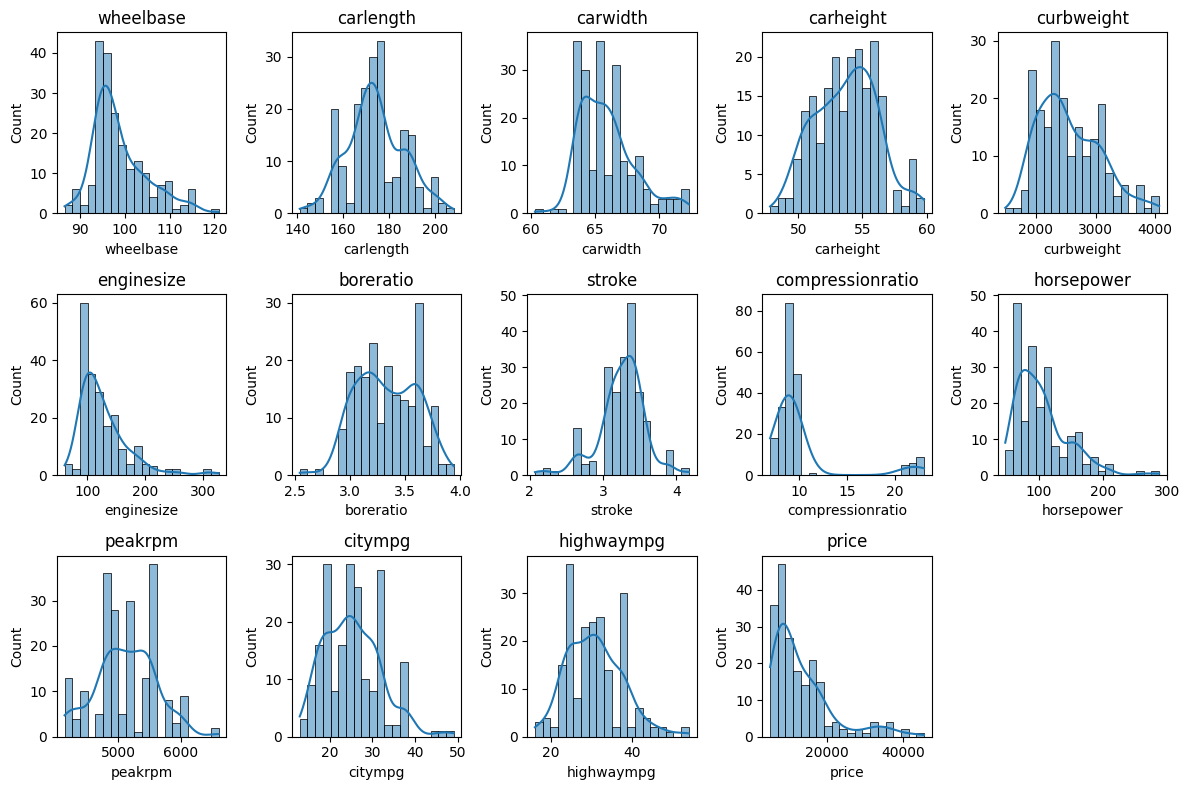

In [8]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

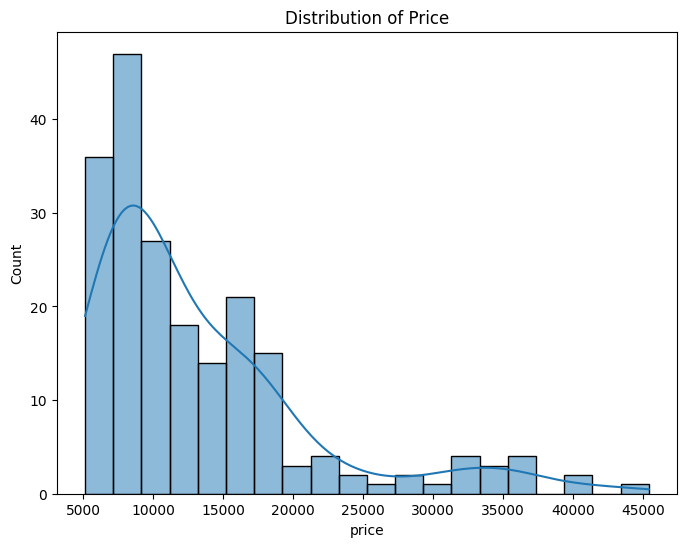

In [9]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

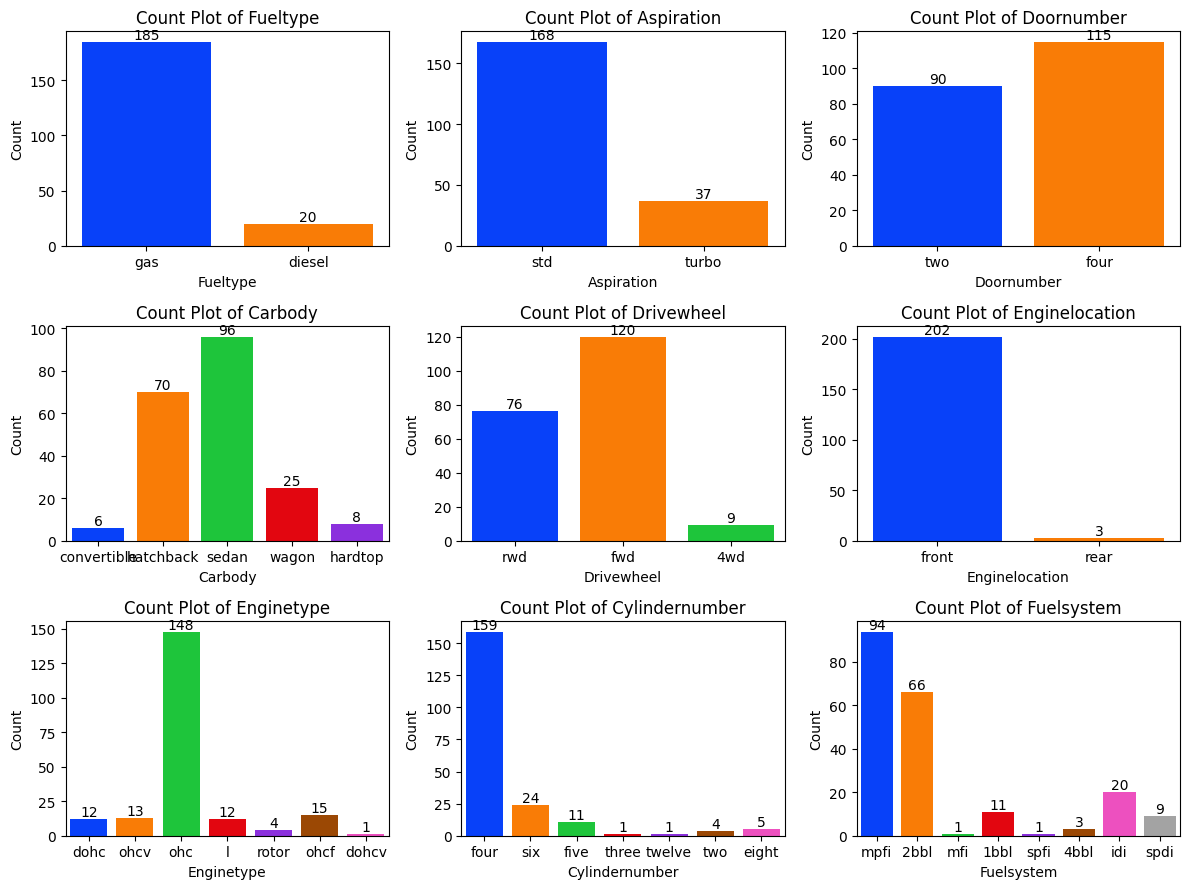

In [10]:
# Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

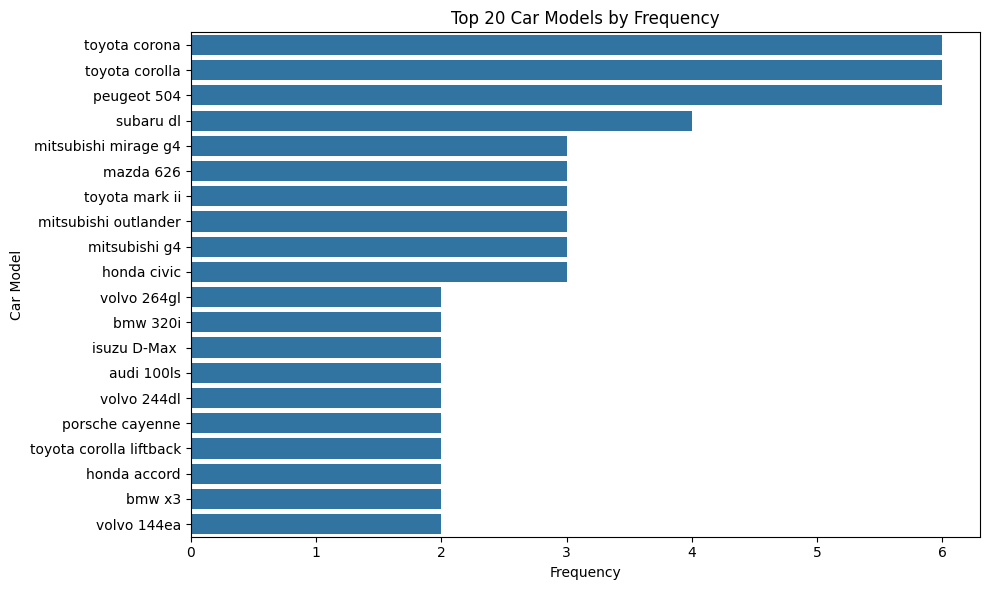

In [11]:
n = 20  # Number of top car models to plot
top_car_models = df['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

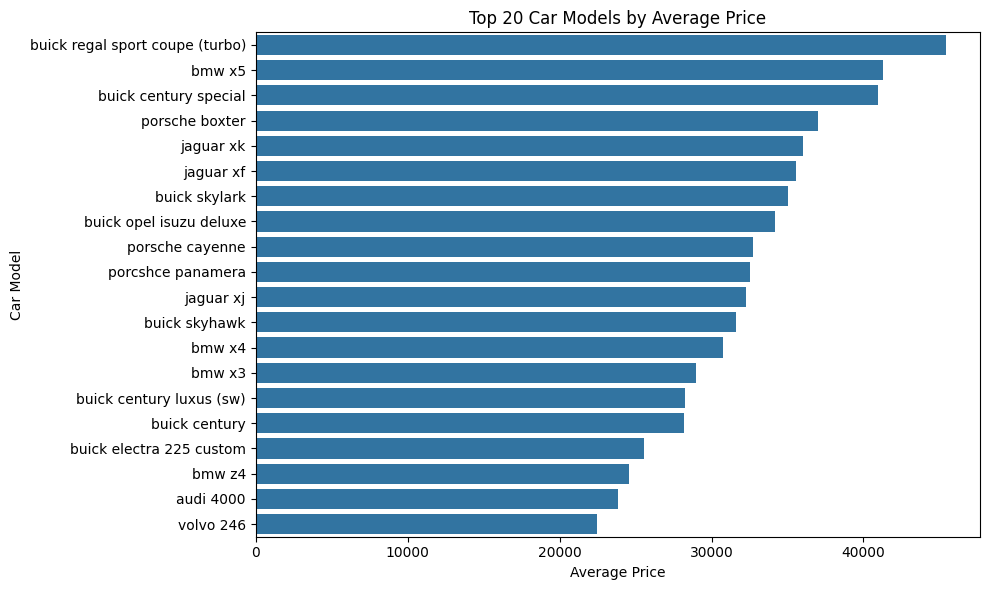

In [12]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

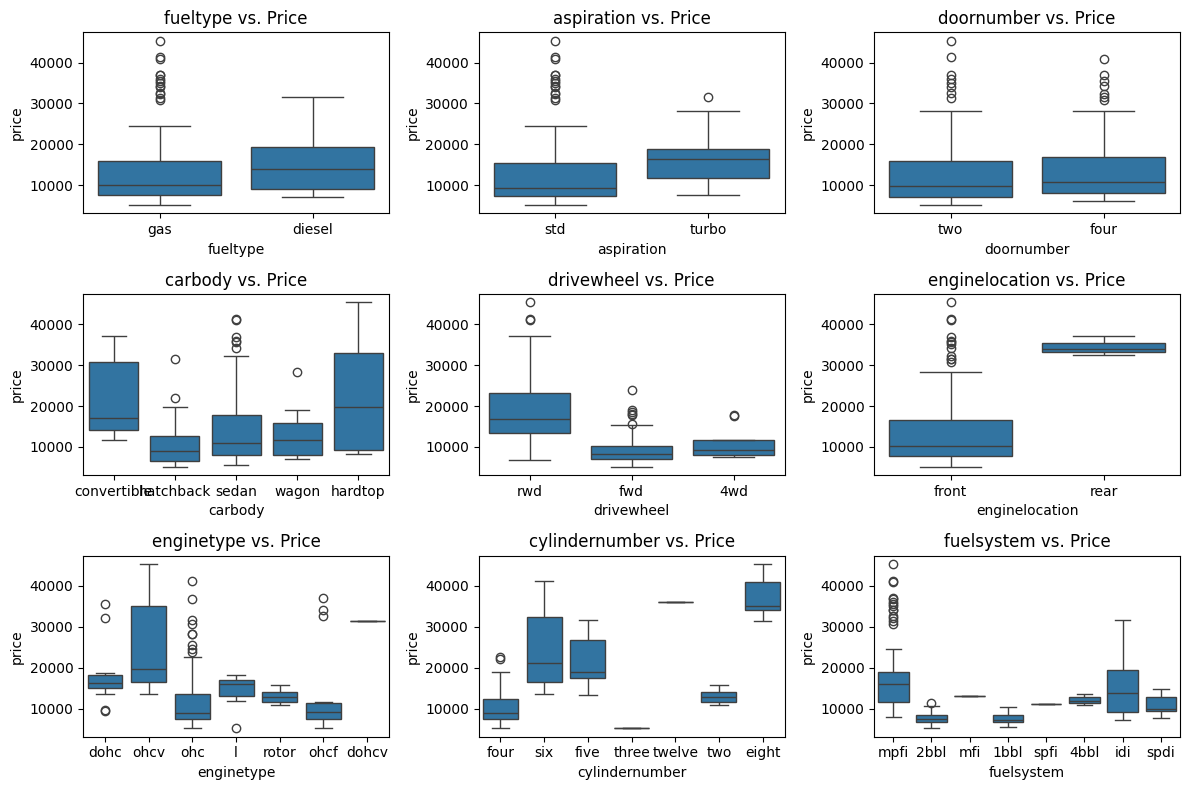

In [13]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

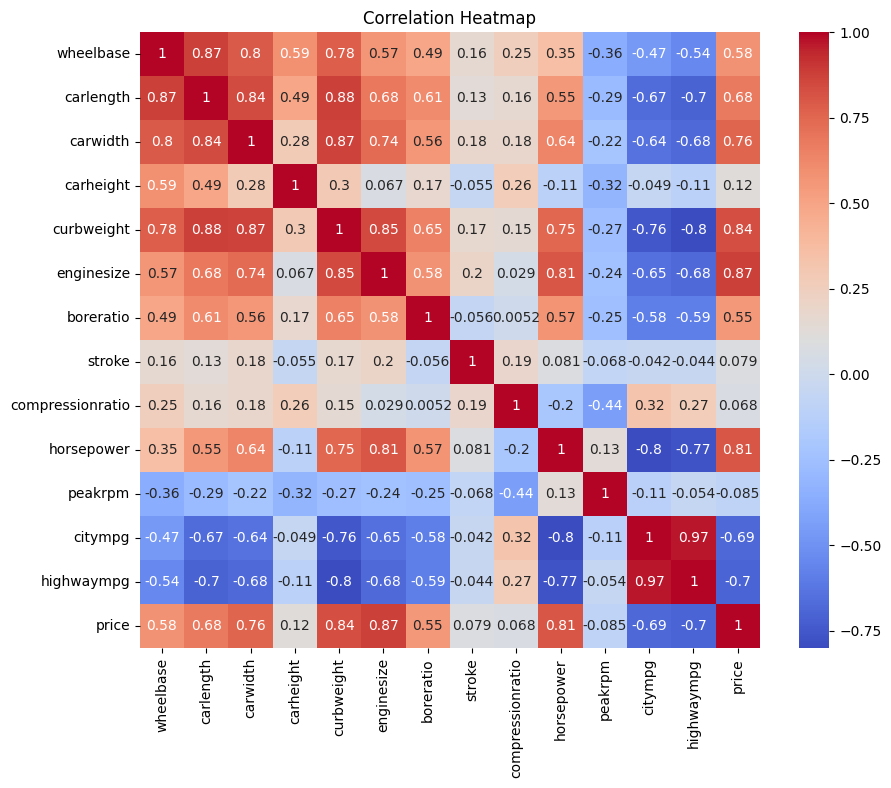

In [14]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Hasil Analisis

- Dataset mencakup informasi tentang harga mobil dengan total 205 model mobil yang semuanya unik.
- Bentuk dataset adalah (Jumlah Baris = 205, Jumlah Kolom = 26).
- Setiap kolom dalam dataset tidak mengandung nilai null atau nilai yang diduplikasi.

### Ringkasan Analisis

#### Harga Mobil
- Rata-rata harga mobil dalam dataset ini adalah $13,276.
- Harga mobil berkisar dari $5,118 hingga $45,400.

#### Pengaruh fitur lain
- Sekitar 90% mobil menggunakan bahan bakar Gas, dengan harga rata-rata lebih rendah dibandingkan mobil yang menggunakan Diesel
- Mayoritas pengguna (56%) memilih mobil dengan 4 pintu, sementara 46% memilih mobil dengan 2 pintu dan menunjukkan harga rata-rata yang tidak terlalu berbeda.
- Mayoritas pengguna memilih tipe mobil Sedan yang lebih murah.
- Sebagian besar mobil di dataset ini menggunakan Front-Wheel Drive (fwd), yang mungkin dipilih karena harganya yang lebih rendah.
- Tipe mesin paling umum adalah "ohc" yang menunjukkan harga lebih murah.
- Terdapat korelasi antara jumlah silinder dan harga mobil, di mana harga cenderung meningkat seiring dengan peningkatan jumlah silinder.
- Peningkatan ukuran mesin juga berkorelasi dengan peningkatan harga mobil.
- Beberapa faktor seperti wheelbase, panjang mobil, dan lebar mobil mempengaruhi harga, sementara tinggi mobil tidak memiliki dampak signifikan.

In [15]:
# Extract brand and model from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [16]:
# Splitting the dataset
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model using Keras
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='normal', activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)

# Make predictions
y_pred = model.predict(X_test)




2/2 [==============================] - 0s 3ms/step


In [21]:
print("Summary of the Linear Regression Model:")
model.summary()

Summary of the Linear Regression Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
print("Fitur yang Digunakan dalam Model:")
print(X_train.columns)


Fitur yang Digunakan dalam Model:
Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'brand', 'model',
       'power_to_weight_ratio', 'wheelbase_squared', 'carlength_squared',
       'carwidth_squared', 'carheight_squared', 'curbweight_squared',
       'enginesize_squared', 'boreratio_squared', 'stroke_squared',
       'compressionratio_squared', 'horsepower_squared', 'peakrpm_squared',
       'citympg_squared', 'highwaympg_squared', 'log_enginesize'],
      dtype='object')


### Pertanyaan 1:
#### Fitur apa saja yang paling mempengaruhi harga mobil

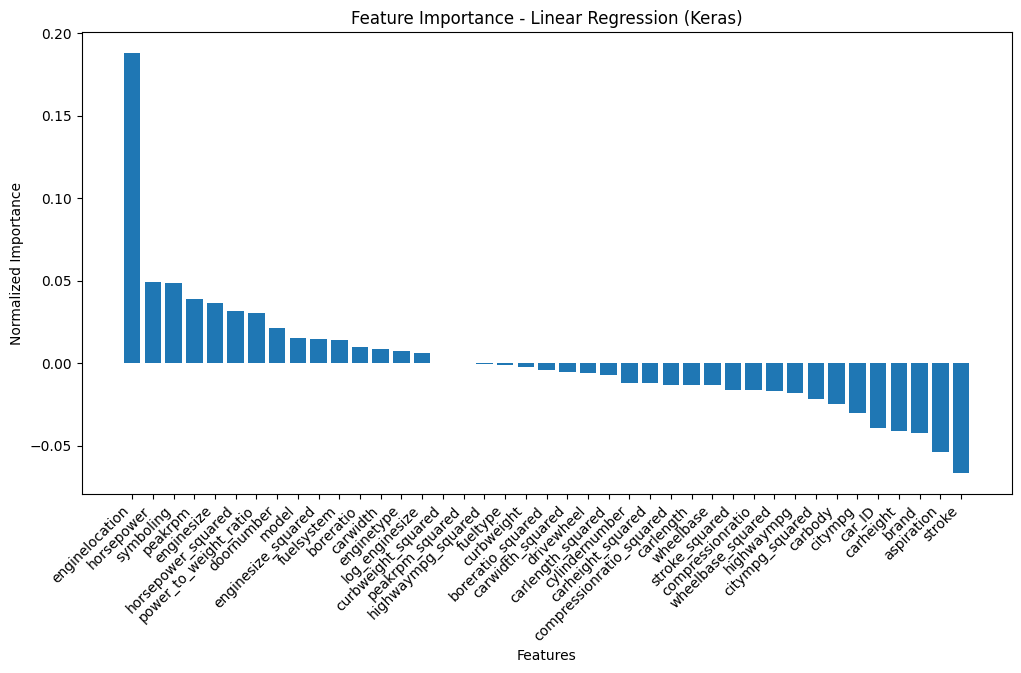

In [17]:
weights = model.layers[0].get_weights()[0]
normalized_weights = weights / np.sum(np.abs(weights))

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': normalized_weights.flatten()})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance - Linear Regression (Keras)')
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
top_5_features = feature_importance_df.head(5)

print("Top 5 Most Important Features:")
print(top_5_features)

Top 5 Most Important Features:
           Feature  Importance
7   enginelocation    0.187861
20      horsepower    0.049213
1        symboling    0.048491
21         peakrpm    0.038978
15      enginesize    0.036378


### Pertanyaan 2:
#### Apakah fitur-fitur tersebut bisa diandalkan secara akurat untuk menebak harga mobil

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8366511621749702
Mean Squared Error: 12895414.063926974


## Conclusion

#### Fitur apa saja yang paling mempengaruhi harga mobil
Berdasarkan nilai koefisien dari model regresi linear, kita dapat mengidentifikasi fitur-fitur yang memiliki dampak paling besar pada harga mobil. Dalam hal ini, berikut adalah interpretasi untuk lima fitur paling penting:

-Engine Location (enginelocation):
Koefisien besar menunjukkan bahwa lokasi mesin memiliki dampak signifikan pada harga mobil. Mungkin mobil dengan lokasi mesin tertentu memiliki harga yang lebih tinggi.

-Peak RPM (peakrpm):
Koefisien besar menunjukkan bahwa kecepatan putaran puncak mesin (peak RPM) juga memiliki pengaruh yang cukup signifikan pada harga mobil.

-Horsepower (horsepower):
Koefisien yang cukup besar menunjukkan bahwa tenaga kuda (horsepower) memainkan peran penting dalam menentukan harga mobil.

-Symboling (symboling):
Koefisien menunjukkan bahwa rating risiko asuransi (symboling) mempengaruhi harga mobil. Semakin tinggi atau rendahnya risiko dapat memengaruhi harga.

-Engine Size (enginesize):
Koefisien menunjukkan bahwa ukuran mesin memiliki dampak pada harga mobil. Mobil dengan ukuran mesin yang lebih besar cenderung memiliki harga yang lebih tinggi.

Dengan melihat koefisien ini, kita dapat membuat asumsi atau interpretasi bahwa fitur-fitur ini memiliki korelasi positif atau negatif dengan harga mobil. Namun, perlu diingat bahwa interpretasi ini bersifat relatif dan harus dipahami dalam konteks dataset spesifik ini.

#### Apakah fitur-fitur tersebut bisa diandalkan secara akurat untuk menebak harga mobil
Berdasarkan R-squared yang tinggi, sekitar 83.67% variabilitas harga mobil dapat dijelaskan oleh fitur-fitur yang ada dalam model. Ini menandakan bahwa model memiliki kinerja yang baik dalam menjelaskan variasi harga.

Meskipun demikian, nilai MSE yang sebesar 12,895,414.06 menunjukkan bahwa terdapat variasi yang cukup besar antara nilai sebenarnya dan nilai yang diprediksi. Oleh karena itu, sementara model memberikan perkiraan yang baik secara umum, masih ada kesalahan prediksi yang cukup signifikan.

In [20]:
model.save('model.h5')